<a href="https://colab.research.google.com/github/George-Okello/XAI/blob/main/explainable_AI_(XAI)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap pandas scikit-learn matplotlib seaborn ucimlrepo


In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

In [ ]:
# fetch dataset
statlog_heart = fetch_ucirepo(id=145)

# data (as pandas dataframes)
X = statlog_heart.data.features
y = statlog_heart.data.targets['heart-disease']

# metadata
display(statlog_heart.metadata)

# variable information
display(statlog_heart.variables)


{'uci_id': 145,
 'name': 'Statlog (Heart)',
 'repository_url': 'https://archive.ics.uci.edu/dataset/145/statlog+heart',
 'data_url': 'https://archive.ics.uci.edu/static/public/145/data.csv',
 'abstract': 'This dataset is a heart disease database similar to a database already present in the repository (Heart Disease databases) but in a slightly different form',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 270,
 'num_features': 13,
 'feature_types': ['Categorical', 'Real'],
 'demographics': ['Age', 'Sex'],
 'target_col': ['heart-disease'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': None,
 'last_updated': 'Fri Feb 09 2024',
 'dataset_doi': '10.24432/C57303',
 'creators': [],
 'intro_paper': None,
 'additional_info': {'summary': 'Cost Matrix\r\n\r\n_______\t abse  pres\r\nabsence\t 0\t1\r\npresence  5\t0\r\n\r\nwhere the rows represent the true values 

name     role         type demographic  \
0                    age  Feature   Continuous         Age   
1                    sex  Feature       Binary         Sex   
2             chest-pain  Feature  Categorical        None   
3                rest-bp  Feature   Continuous        None   
4             serum-chol  Feature   Continuous        None   
5    fasting-blood-sugar  Feature       Binary        None   
6   electrocardiographic  Feature  Categorical        None   
7         max-heart-rate  Feature   Continuous        None   
8                 angina  Feature       Binary        None   
9                oldpeak  Feature   Continuous        None   
10                 slope  Feature      Integer        None   
11         major-vessels  Feature   Continuous        None   
12                  thal  Feature  Categorical        None   
13         heart-disease   Target      Integer        None   

                                          description  units missing_values  
0                                                None   None             no  
1                                                None   None             no  
2                                     chest pain type   None             no  
3                              resting blood pressure   None             no  
4                                   serum cholesterol  mg/dl             no  
5                     fasting blood sugar > 120 mg/dl   None             no  
6                resting electrocardiographic results   None             no  
7                         maximum heart rate achieved   None             no  
8                             exercise induced anigna   None             no  
9   oldpeak = ST depression induced by exercise re...   None             no  
10           the slope of the peak exercise ST sgment   None             no  
11  number of major vessels (0-3) colored by fluor...   None             no  
12  thal: 3 = normal; 6 = fixed defect; 7 = revers...   None             no  
13                                               None   None             no

In [ ]:
# Convert target from 1/2 → 0/1
y = y.replace({1: 0, 2: 1})
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: heart-disease, Length: 270, dtype: int64

In [ ]:
# Convert categorical features to dummy variables
X_encoded = pd.get_dummies(X, drop_first=True)

print("Shape after encoding:", X_encoded.shape)


Shape after encoding: (270, 13)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Train a decision tree
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.86      0.81        49
           1       0.73      0.59      0.66        32

    accuracy                           0.75        81
   macro avg       0.75      0.73      0.73        81
weighted avg       0.75      0.75      0.75        81



This means the model is reasonably good but not perfect, especially in identifying people with heart disease. This makes explanations important — we need to understand how the model decides, especially for risky or false predictions

Class 1 SHAP values shape: (81, 13)


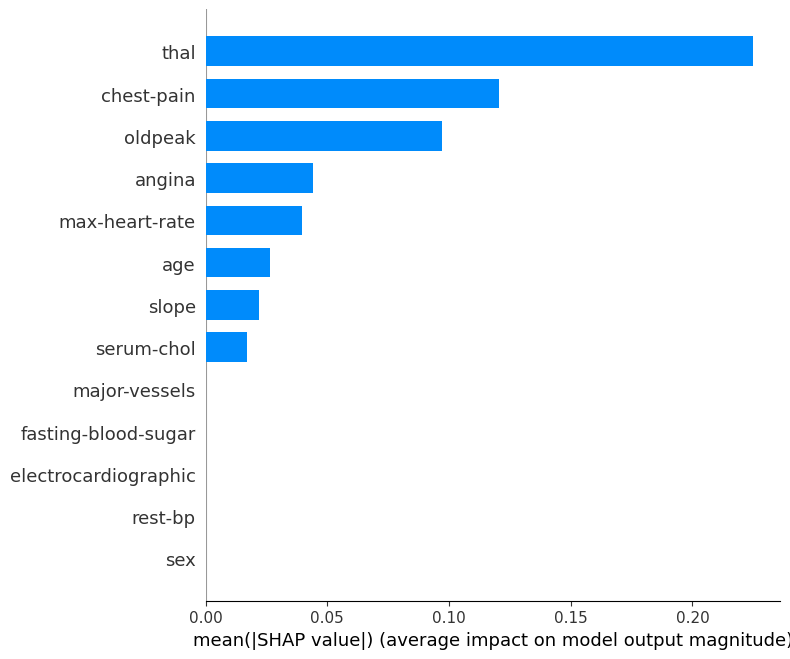

In [ ]:
import shap
import numpy as np

# If you're using a TreeExplainer:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# ✅ Correct way for summary bar plot for binary classification:
# shap_values[1] if you're interested in class 1 (heart disease present)
shap_values_class1 = np.array([sample[:, 1] for sample in shap_values])
print("Class 1 SHAP values shape:", shap_values_class1.shape)  # Should be (81, 13)

# Now create the summary plot
shap.summary_plot(shap_values_class1, X_test, plot_type="bar")


thal: Availability Heuristic – thalassemia is rare but heavily weighted.
chest-pain: Framing Effect – pain framed as severe may bias decisions.
oldpeak: Anchoring Bias – decisions anchored to initial ST depression value.
angina: Representativeness Heuristic – classic symptoms bias diagnosis.
max-heart-rate: Affect Heuristic – emotional response to high/low values.


In [ ]:
import pandas as pd
import numpy as np

# First, let's see all column names
print("All columns in X_test:")
print(X_test.columns.tolist())
print(f"\nTotal columns: {len(X_test.columns)}")

# Look for thal-related columns with different patterns
print("\n" + "="*50)
print("Searching for thal-related columns:")
print("="*50)

# Try different search patterns
thal_patterns = ['thal', 'Thal', 'THAL', 'tal', 'defect']
for pattern in thal_patterns:
    matching_cols = [col for col in X_test.columns if pattern in col]
    if matching_cols:
        print(f"Columns containing '{pattern}': {matching_cols}")

# Check if there's a single 'thal' column (not one-hot encoded)
if 'thal' in X_test.columns:
    print(f"\nFound 'thal' column!")
    print(f"Unique values in thal: {sorted(X_test['thal'].unique())}")
    print(f"Value counts:\n{X_test['thal'].value_counts().sort_index()}")
elif 'Thal' in X_test.columns:
    print(f"\nFound 'Thal' column!")
    print(f"Unique values in Thal: {sorted(X_test['Thal'].unique())}")
    print(f"Value counts:\n{X_test['Thal'].value_counts().sort_index()}")
else:
    print("\nNo direct 'thal' column found.")

    # Let's look at the last few columns (thal is often the last feature)
    print(f"\nLast 5 columns: {X_test.columns[-5:].tolist()}")

    # Show sample of data to help identify the pattern
    print(f"\nFirst few rows of data:")
    print(X_test.head())

    # Look for categorical columns that might be thal
    print(f"\nColumns with limited unique values (potential categorical):")
    for col in X_test.columns:
        unique_vals = X_test[col].nunique()
        if unique_vals <= 5:  # Likely categorical
            print(f"{col}: {unique_vals} unique values - {sorted(X_test[col].unique())}")

# Check if there are numbered columns that might be one-hot encoded features
print(f"\n" + "="*50)
print("Checking for numbered columns (possible one-hot encoding):")
print("="*50)

numbered_cols = [col for col in X_test.columns if any(char.isdigit() for char in str(col))]
if numbered_cols:
    print(f"Columns with numbers: {numbered_cols}")

    # Group by base name
    base_names = {}
    for col in numbered_cols:
        base = ''.join([c for c in col if not c.isdigit() and c != '_'])
        if base not in base_names:
            base_names[base] = []
        base_names[base].append(col)

    for base, cols in base_names.items():
        if len(cols) > 1:
            print(f"Potential one-hot group '{base}': {cols}")

# If we still haven't found thal, let's check the original dataset structure
print(f"\n" + "="*50)
print("Dataset Info:")
print("="*50)
print(f"Shape: {X_test.shape}")
print(f"Data types:\n{X_test.dtypes}")

# Common heart disease dataset column patterns
common_heart_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                     'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

print(f"\nChecking for common heart disease dataset columns:")
for col in common_heart_cols:
    if col in X_test.columns:
        print(f"✓ {col} found")
    else:
        # Check for partial matches
        partial_matches = [c for c in X_test.columns if col in c.lower()]
        if partial_matches:
            print(f"~ {col} partial matches: {partial_matches}")
        else:
            print(f"✗ {col} not found")

All columns in X_test:
['age', 'sex', 'chest-pain', 'rest-bp', 'serum-chol', 'fasting-blood-sugar', 'electrocardiographic', 'max-heart-rate', 'angina', 'oldpeak', 'slope', 'major-vessels', 'thal']

Total columns: 13

Searching for thal-related columns:
Columns containing 'thal': ['thal']

Found 'thal' column!
Unique values in thal: [np.float64(3.0), np.float64(6.0), np.float64(7.0)]
Value counts:
thal
3.0    50
6.0     3
7.0    28
Name: count, dtype: int64

Checking for numbered columns (possible one-hot encoding):

Dataset Info:
Shape: (81, 13)
Data types:
age                     float64
sex                     float64
chest-pain              float64
rest-bp                 float64
serum-chol              float64
fasting-blood-sugar     float64
electrocardiographic    float64
max-heart-rate          float64
angina                  float64
oldpeak                 float64
slope                   float64
major-vessels           float64
thal                    float64
dtype: object

Check

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set up matplotlib for Jupyter
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# Set up the plotting style
plt.style.use('default')  # More Jupyter-friendly than seaborn
sns.set_palette("husl")


In [ ]:
# Custom color palette
colors = {
    'normal': '#2E86AB',      # Blue
    'reversible': '#A23B72',  # Purple
    'accent': '#F18F01',      # Orange
    'text': '#2D3436'         # Dark gray
}

def create_custom_shap_plot(shap_values, X_data, title, color, figsize=(12, 8)):
    """Create a custom SHAP bar plot with better styling for Jupyter"""

    # Calculate mean absolute SHAP values
    mean_shap = np.abs(shap_values).mean(axis=0)

    # Create feature importance dataframe
    feature_importance = pd.DataFrame({
        'feature': X_data.columns,
        'importance': mean_shap
    }).sort_values('importance', ascending=True)

    # Create the plot
    fig, ax = plt.subplots(figsize=figsize, facecolor='white')

    # Create horizontal bar plot
    y_pos = np.arange(len(feature_importance))
    bars = ax.barh(y_pos, feature_importance['importance'],
                   color=color, alpha=0.85, edgecolor='white', linewidth=1.5)

    # Customize the plot
    ax.set_yticks(y_pos)
    ax.set_yticklabels(feature_importance['feature'], fontsize=11, fontweight='600')
    ax.set_xlabel('Mean |SHAP Value|', fontsize=13, fontweight='700', color=colors['text'])
    ax.set_title(title, fontsize=16, fontweight='800', pad=25, color=colors['text'])

    # Add value labels on bars
    max_val = feature_importance['importance'].max()
    for i, (bar, value) in enumerate(zip(bars, feature_importance['importance'])):
        width = bar.get_width()
        ax.text(width + max_val*0.02, bar.get_y() + bar.get_height()/2,
                f'{value:.3f}', ha='left', va='center',
                fontsize=9, fontweight='600', color=colors['text'])

    # Styling
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.grid(True, alpha=0.3, linestyle='--', color='gray')
    ax.set_facecolor('#FAFAFA')

    # Sample size annotation
    ax.text(0.98, 0.02, f'n = {len(X_data)}',
            transform=ax.transAxes, ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.4', facecolor=color, alpha=0.2, edgecolor=color),
            fontsize=10, fontweight='600', color=colors['text'])

    plt.tight_layout()
    return fig, ax

print("✅ Custom plotting function defined!")

✅ Custom plotting function defined!


In [ ]:
print("📊 Preparing data for SHAP analysis...")
print("="*50)

# Check thal column values and create subsets
print(f"Thal value distribution:")
thal_counts = X_test['thal'].value_counts().sort_index()
print(thal_counts)

# Create subsets
thal_3 = X_test[X_test['thal'] == 3.0]  # normal
thal_7 = X_test[X_test['thal'] == 7.0]  # reversible defect

print(f"\n📈 Sample sizes:")
print(f"• Normal (thal=3): {len(thal_3)} samples")
print(f"• Reversible Defect (thal=7): {len(thal_7)} samples")

if len(thal_3) == 0 or len(thal_7) == 0:
    print("⚠️ Warning: One of the groups is empty!")

print("✅ Data preparation complete!")

📊 Preparing data for SHAP analysis...
Thal value distribution:
thal
3.0    50
6.0     3
7.0    28
Name: count, dtype: int64

📈 Sample sizes:
• Normal (thal=3): 50 samples
• Reversible Defect (thal=7): 28 samples
✅ Data preparation complete!


In [ ]:
print("🔄 Computing SHAP values...")

try:
    # Compute SHAP values for each subset
    print("Computing SHAP for normal thalassemia...")
    shap_values_3 = explainer.shap_values(thal_3)

    print("Computing SHAP for reversible defect...")
    shap_values_7 = explainer.shap_values(thal_7)

    # Convert to class 1 (heart disease) SHAP values
    shap_values_3_class1 = np.array([sample[:, 1] for sample in shap_values_3])
    shap_values_7_class1 = np.array([sample[:, 1] for sample in shap_values_7])

    print(f"✅ SHAP computation complete!")
    print(f"• Normal group SHAP shape: {shap_values_3_class1.shape}")
    print(f"• Reversible defect SHAP shape: {shap_values_7_class1.shape}")

except Exception as e:
    print(f"❌ Error computing SHAP values: {e}")
    print("Make sure 'explainer' is defined in your environment")

🔄 Computing SHAP values...
Computing SHAP for normal thalassemia...
Computing SHAP for reversible defect...
✅ SHAP computation complete!
• Normal group SHAP shape: (50, 13)
• Reversible defect SHAP shape: (28, 13)


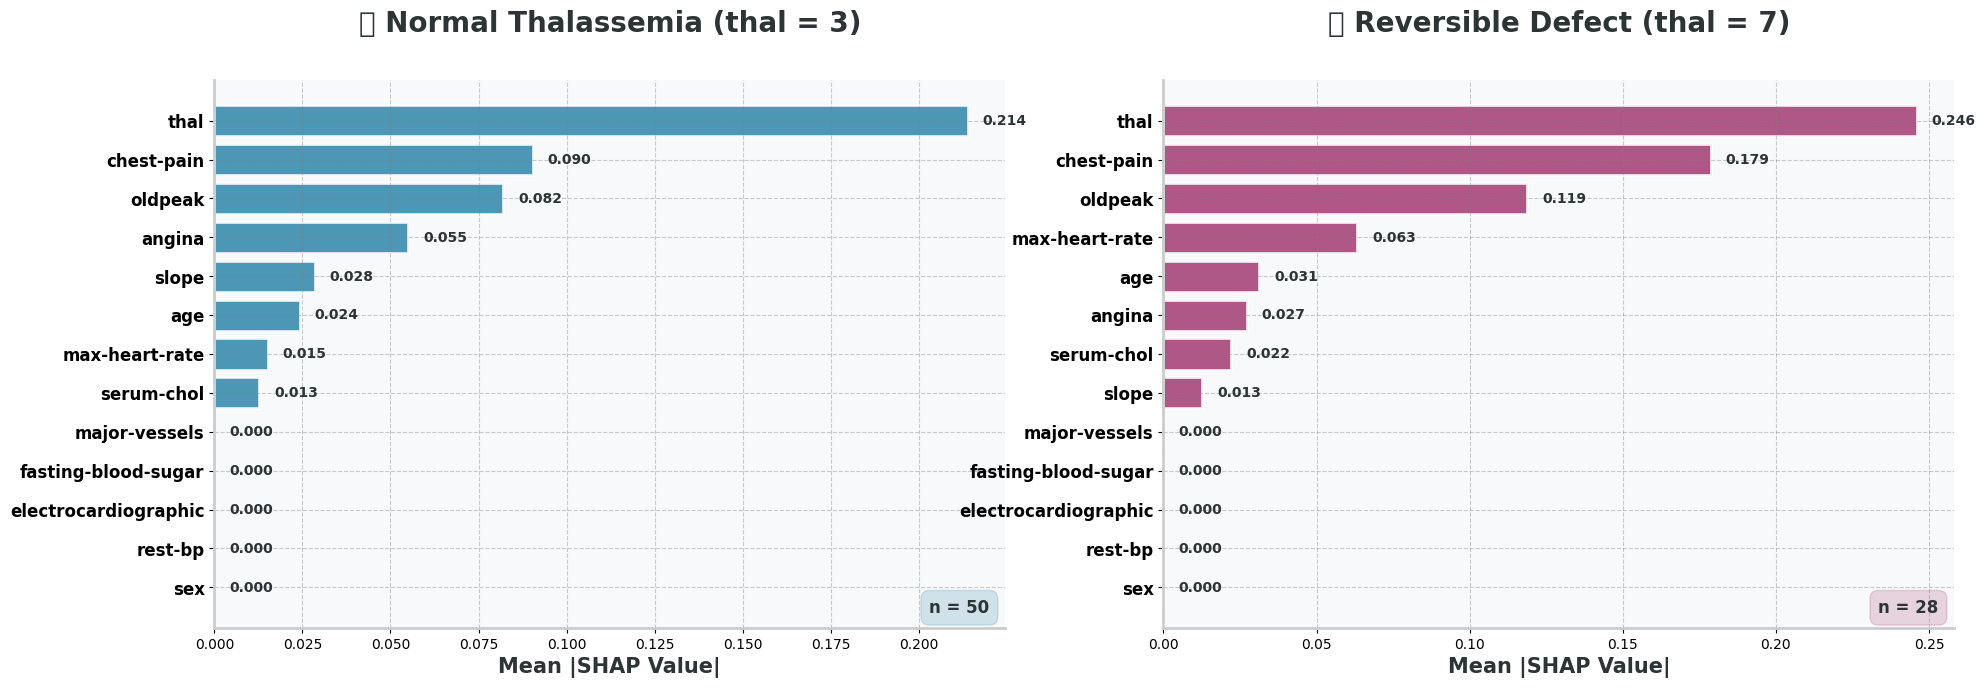

In [ ]:
def plot_enhanced_shap(ax, shap_values, X_data, title, color):
    mean_shap = np.abs(shap_values).mean(axis=0)
    feature_importance = pd.DataFrame({
        'feature': X_data.columns,
        'importance': mean_shap
    }).sort_values('importance', ascending=True)

    y_pos = np.arange(len(feature_importance))
    bars = ax.barh(y_pos, feature_importance['importance'],
                   color=color, alpha=0.85, edgecolor='white', linewidth=2)

    ax.set_yticks(y_pos)
    ax.set_yticklabels(feature_importance['feature'], fontsize=12, fontweight='600')
    ax.set_xlabel('Mean |SHAP Value|', fontsize=15, fontweight='700', color=colors['text'])
    ax.set_title(title, fontsize=20, fontweight='800', pad=35, color=colors['text'])

    max_val = feature_importance['importance'].max()
    for i, (bar, value) in enumerate(zip(bars, feature_importance['importance'])):
        width = bar.get_width()
        ax.text(width + max_val*0.02, bar.get_y() + bar.get_height()/2,
                f'{value:.3f}', ha='left', va='center',
                fontsize=10, fontweight='600', color=colors['text'])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.grid(True, alpha=0.4, linestyle='--', color='gray')
    ax.set_facecolor('#F8F9FA')

    ax.text(0.98, 0.02, f'n = {len(X_data)}',
            transform=ax.transAxes, ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', facecolor=color, alpha=0.2, edgecolor=color),
            fontsize=12, fontweight='600', color=colors['text'])

# Create figure layout
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 2, height_ratios=[3, 1], hspace=0.4, wspace=0.2,
                      top=0.88, bottom=0.15, left=0.08, right=0.95)

# Add plots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

plot_enhanced_shap(ax1, shap_values_3_class1, thal_3,
                   '🫀 Normal Thalassemia (thal = 3)', colors['normal'])

plot_enhanced_shap(ax2, shap_values_7_class1, thal_7,
                   '💔 Reversible Defect (thal = 7)', colors['reversible'])


In [ ]:
print("\n📋 Creating feature importance comparison table...")

# Create feature comparison
mean_shap_3 = np.abs(shap_values_3_class1).mean(axis=0)
mean_shap_7 = np.abs(shap_values_7_class1).mean(axis=0)

comparison_df = pd.DataFrame({
    'Feature': thal_3.columns,
    'Normal_Importance': mean_shap_3,
    'Reversible_Defect_Importance': mean_shap_7,
    'Difference': mean_shap_7 - mean_shap_3,
    'Ratio': mean_shap_7 / (mean_shap_3 + 1e-10)
}).sort_values('Difference', key=abs, ascending=False)

print("🔍 Top Feature Differences (Reversible Defect vs Normal):")
print("="*65)

# Display formatted table
display_df = comparison_df.round(4).head(8)
display_df['Difference'] = display_df['Difference'].apply(lambda x: f"{x:+.4f}")
display_df['Ratio'] = display_df['Ratio'].apply(lambda x: f"{x:.2f}x")

print(display_df.to_string(index=False))

print("\n💡 Interpretation:")
print("• Positive difference: More important for reversible defect")
print("• Negative difference: More important for normal thalassemia")
print("• Ratio > 1: Feature is more important for reversible defect")


📋 Creating feature importance comparison table...
🔍 Top Feature Differences (Reversible Defect vs Normal):
       Feature  Normal_Importance  Reversible_Defect_Importance Difference Ratio
    chest-pain             0.0904                        0.1787    +0.0883 1.98x
max-heart-rate             0.0152                        0.0633    +0.0481 4.17x
       oldpeak             0.0820                        0.1188    +0.0368 1.45x
          thal             0.2138                        0.2460    +0.0321 1.15x
        angina             0.0551                        0.0272    -0.0279 0.49x
         slope             0.0285                        0.0126    -0.0159 0.44x
    serum-chol             0.0127                        0.0221    +0.0094 1.74x
           age             0.0242                        0.0313    +0.0071 1.29x

💡 Interpretation:
• Positive difference: More important for reversible defect
• Negative difference: More important for normal thalassemia
• Ratio > 1: Feature is


📊 Creating individual detailed plots...
Creating plot for Normal Thalassemia...


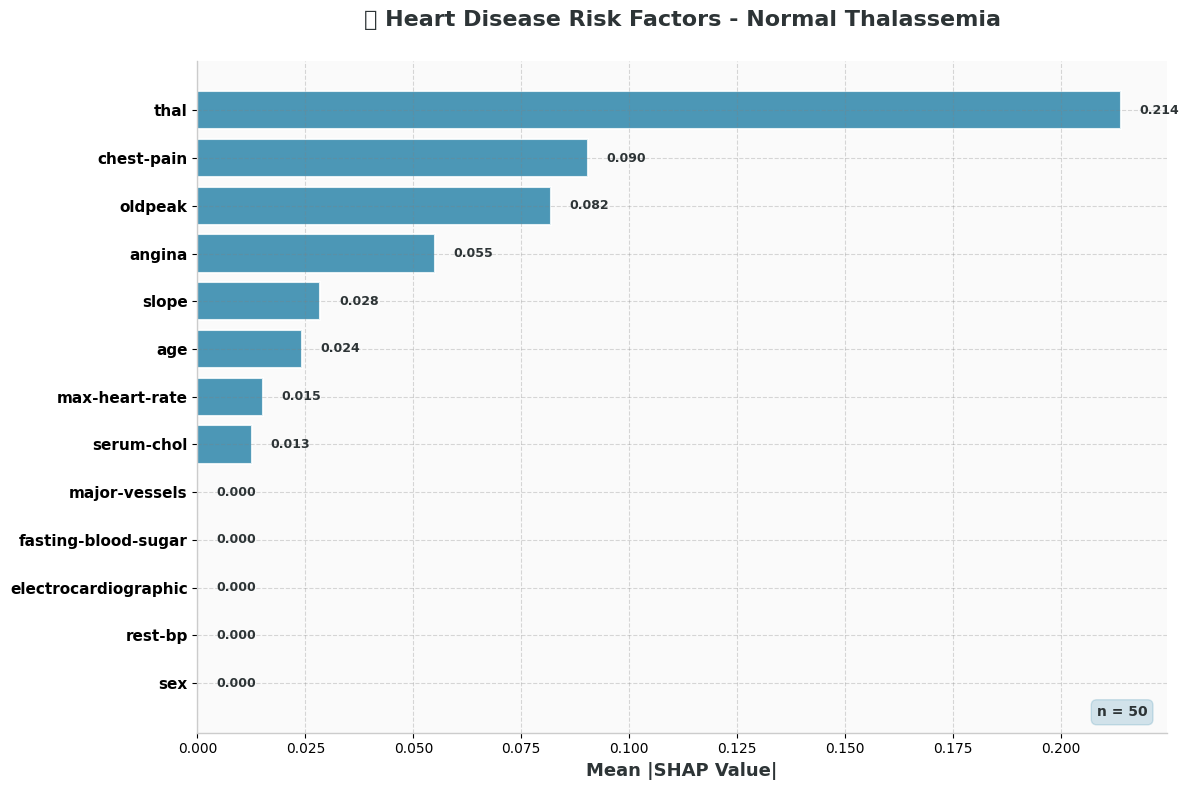

Creating plot for Reversible Defect...


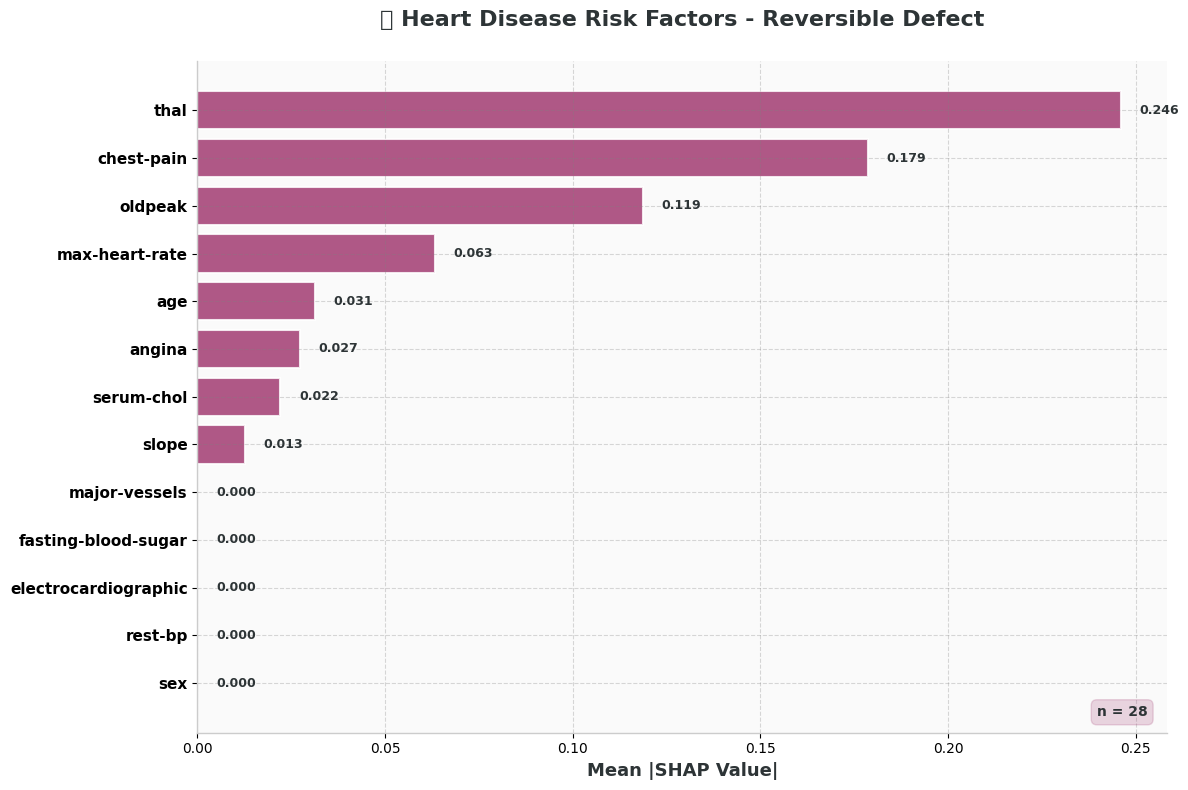

In [ ]:
print("\n📊 Creating individual detailed plots...")

# Individual plot for Normal
print("Creating plot for Normal Thalassemia...")
fig1, ax1 = create_custom_shap_plot(shap_values_3_class1, thal_3,
                                   '🫀 Heart Disease Risk Factors - Normal Thalassemia',
                                   colors['normal'])
plt.show()

# Individual plot for Reversible Defect
print("Creating plot for Reversible Defect...")
fig2, ax2 = create_custom_shap_plot(shap_values_7_class1, thal_7,
                                   '💔 Heart Disease Risk Factors - Reversible Defect',
                                   colors['reversible'])
plt.show()

In [ ]:
print(f"\n📈 Dataset Summary:")
print(f"• Total samples: {len(X_test)}")
print(f"• Normal thalassemia: {len(thal_3)} samples ({len(thal_3)/len(X_test)*100:.1f}%)")
print(f"• Reversible defect: {len(thal_7)} samples ({len(thal_7)/len(X_test)*100:.1f}%)")

# Find top 3 most different features
top_features = comparison_df.head(3)
print(f"\n🔍 Top 3 Most Different Features:")
for i, (_, row) in enumerate(top_features.iterrows(), 1):
    direction = "higher" if row['Difference'] > 0 else "lower"
    print(f"{i}. {row['Feature']}: {abs(row['Difference']):.4f} {direction} importance for reversible defect")



📈 Dataset Summary:
• Total samples: 81
• Normal thalassemia: 50 samples (61.7%)
• Reversible defect: 28 samples (34.6%)

🔍 Top 3 Most Different Features:
1. chest-pain: 0.0883 higher importance for reversible defect
2. max-heart-rate: 0.0481 higher importance for reversible defect
3. oldpeak: 0.0368 higher importance for reversible defect


In [ ]:
!pip install lime

import lime
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Set up matplotlib for Jupyter
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

print("✅ LIME installed and imported successfully!")


✅ LIME installed and imported successfully!


In [ ]:
print("🔧 Initializing LIME explainer...")

# Create LIME explainer
lime_explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['No Disease', 'Disease'],
    mode='classification',
    discretize_continuous=True,
    random_state=42
)

print("✅ LIME explainer initialized!")
print(f"📊 Training data shape: {X_train.shape}")
print(f"🏷️ Feature names: {list(X_train.columns)}")
print(f"🎯 Classes: ['No Disease', 'Disease']")

🔧 Initializing LIME explainer...
✅ LIME explainer initialized!
📊 Training data shape: (189, 13)
🏷️ Feature names: ['age', 'sex', 'chest-pain', 'rest-bp', 'serum-chol', 'fasting-blood-sugar', 'electrocardiographic', 'max-heart-rate', 'angina', 'oldpeak', 'slope', 'major-vessels', 'thal']
🎯 Classes: ['No Disease', 'Disease']


In [ ]:
print("\n🔍 Explaining individual predictions...")

def explain_single_instance(instance_idx, show_plot=True):
    """Explain a single instance with LIME"""

    # Get the instance
    instance = X_test.iloc[instance_idx]

    # Get model prediction
    prediction_proba = model.predict_proba([instance])[0]
    prediction = model.predict([instance])[0]

    print(f"📋 Instance {instance_idx} Details:")
    print(f"• Prediction: {'Disease' if prediction == 1 else 'No Disease'}")
    print(f"• Confidence: {max(prediction_proba):.3f}")
    print(f"• Probabilities: No Disease={prediction_proba[0]:.3f}, Disease={prediction_proba[1]:.3f}")

    # Create LIME explanation
    exp = lime_explainer.explain_instance(
        instance,
        model.predict_proba,
        num_features=len(X_train.columns),
        top_labels=2
    )

    if show_plot:
        # Show in notebook
        exp.show_in_notebook(show_table=True, show_all=False)

    return exp, instance, prediction_proba



🔍 Explaining individual predictions...


In [ ]:
print("\n📊 Analyzing multiple instances...")

def analyze_multiple_instances(indices_list, thal_type_name=""):
    """Analyze multiple instances and create summary"""

    results = []

    for idx in indices_list:
        try:
            instance = X_test.iloc[idx]
            prediction_proba = model.predict_proba([instance])[0]
            prediction = model.predict([instance])[0]

            # Get LIME explanation
            exp = lime_explainer.explain_instance(
                instance,
                model.predict_proba,
                num_features=len(X_train.columns)
            )

            # Extract feature importance from LIME
            lime_values = dict(exp.as_list())

            results.append({
                'index': idx,
                'prediction': prediction,
                'disease_prob': prediction_proba[1],
                'lime_explanation': lime_values,
                'instance': instance
            })

        except Exception as e:
            print(f"⚠️ Error analyzing instance {idx}: {e}")

    print(f"✅ Analyzed {len(results)} instances for {thal_type_name}")
    return results

# Analyze instances by thalassemia type
print("🔬 Analyzing by Thalassemia type...")

# Get indices for different thal types
thal_3_indices = X_test[X_test['thal'] == 3.0].index.tolist()[:5]  # First 5 normal
thal_7_indices = X_test[X_test['thal'] == 7.0].index.tolist()[:5]  # First 5 reversible

print(f"📈 Sample indices:")
print(f"• Normal thalassemia (3): {thal_3_indices}")
print(f"• Reversible defect (7): {thal_7_indices}")

# Analyze each group
normal_results = analyze_multiple_instances(thal_3_indices, "Normal Thalassemia")
reversible_results = analyze_multiple_instances(thal_7_indices, "Reversible Defect")


📊 Analyzing multiple instances...
🔬 Analyzing by Thalassemia type...
📈 Sample indices:
• Normal thalassemia (3): [79, 127, 196, 137, 209]
• Reversible defect (7): [30, 116, 158, 227, 82]
⚠️ Error analyzing instance 127: single positional indexer is out-of-bounds
⚠️ Error analyzing instance 196: single positional indexer is out-of-bounds
⚠️ Error analyzing instance 137: single positional indexer is out-of-bounds
⚠️ Error analyzing instance 209: single positional indexer is out-of-bounds
✅ Analyzed 1 instances for Normal Thalassemia
⚠️ Error analyzing instance 116: single positional indexer is out-of-bounds
⚠️ Error analyzing instance 158: single positional indexer is out-of-bounds
⚠️ Error analyzing instance 227: single positional indexer is out-of-bounds
⚠️ Error analyzing instance 82: single positional indexer is out-of-bounds
✅ Analyzed 1 instances for Reversible Defect



🎨 Creating comprehensive LIME visualizations...


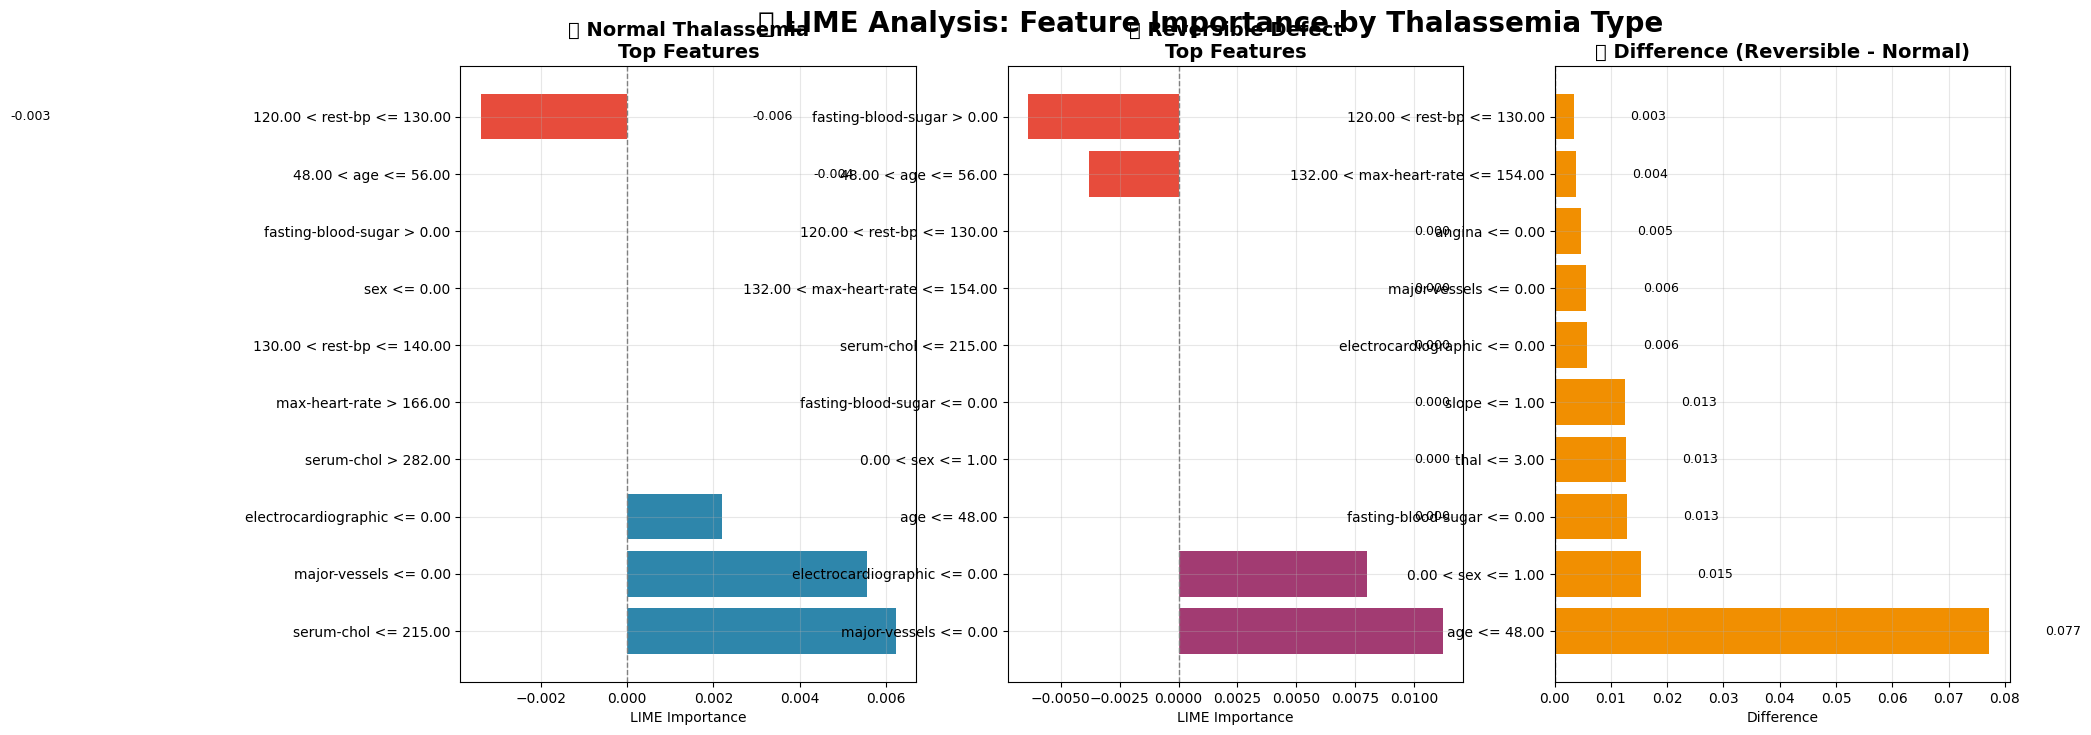


📋 Feature Importance Summary (Top 10)
          Feature            Normal  Reversible  Difference
               age <= 48.00 -0.0771    0.0000      0.0771  
        serum-chol > 282.00  0.0000   -0.0204     -0.0204  
         0.00 < sex <= 1.00 -0.0153    0.0000      0.0153  
fasting-blood-sugar <= 0.00 -0.0129    0.0000      0.0129  
               thal <= 3.00 -0.3863   -0.3737      0.0126  
              slope <= 1.00 -0.0993   -0.0868      0.0125  
    max-heart-rate > 166.00  0.0000   -0.0115     -0.0115  
            oldpeak <= 0.00 -0.1242   -0.1347     -0.0105  
 130.00 < rest-bp <= 140.00  0.0000   -0.0071     -0.0071  
                sex <= 0.00  0.0000   -0.0070     -0.0070  


In [ ]:
print("\n🎨 Creating comprehensive LIME visualizations...")

def create_lime_comparison_plot(normal_results, reversible_results):
    """Create side-by-side LIME comparison plots"""

    # Aggregate LIME values
    def aggregate_lime_values(results):
        all_features = set()
        for result in results:
            all_features.update(result['lime_explanation'].keys())

        feature_importance = {}
        for feature in all_features:
            values = [result['lime_explanation'].get(feature, 0) for result in results]
            feature_importance[feature] = np.mean(values)

        return feature_importance

    normal_importance = aggregate_lime_values(normal_results)
    reversible_importance = aggregate_lime_values(reversible_results)

    # Prepare comparison DataFrame
    all_features = sorted(set(normal_importance) | set(reversible_importance))
    comparison_data = [{
        'Feature': feature,
        'Normal': normal_importance.get(feature, 0),
        'Reversible': reversible_importance.get(feature, 0)
    } for feature in all_features]

    comparison_df = pd.DataFrame(comparison_data)
    comparison_df['Difference'] = comparison_df['Reversible'] - comparison_df['Normal']
    comparison_df = comparison_df.reindex(comparison_df['Difference'].abs().sort_values(ascending=False).index)

    # Create the plot
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
    fig.suptitle('🧪 LIME Analysis: Feature Importance by Thalassemia Type',
                 fontsize=20, fontweight='bold', y=0.95)

    # ---------- Subplot 1: Normal ----------
    normal_df = comparison_df.nlargest(10, 'Normal')
    colors_normal = ['#2E86AB' if x >= 0 else '#E74C3C' for x in normal_df['Normal']]
    ax1.barh(normal_df['Feature'], normal_df['Normal'], color=colors_normal)
    ax1.set_title('🫀 Normal Thalassemia\nTop Features', fontsize=14, fontweight='bold')
    ax1.set_xlabel('LIME Importance')
    ax1.axvline(0, color='gray', linestyle='--', linewidth=1)
    ax1.grid(alpha=0.3)

    # Value labels
    for i, v in enumerate(normal_df['Normal']):
        ax1.text(v + (0.01 if v >= 0 else -0.01), i, f'{v:.3f}',
                 va='center', ha='left' if v >= 0 else 'right', fontsize=9)

    # ---------- Subplot 2: Reversible ----------
    reversible_df = comparison_df.nlargest(10, 'Reversible')
    colors_reversible = ['#A23B72' if x >= 0 else '#E74C3C' for x in reversible_df['Reversible']]
    ax2.barh(reversible_df['Feature'], reversible_df['Reversible'], color=colors_reversible)
    ax2.set_title('💔 Reversible Defect\nTop Features', fontsize=14, fontweight='bold')
    ax2.set_xlabel('LIME Importance')
    ax2.axvline(0, color='gray', linestyle='--', linewidth=1)
    ax2.grid(alpha=0.3)

    for i, v in enumerate(reversible_df['Reversible']):
        ax2.text(v + (0.01 if v >= 0 else -0.01), i, f'{v:.3f}',
                 va='center', ha='left' if v >= 0 else 'right', fontsize=9)

    # ---------- Subplot 3: Difference ----------
    diff_df = comparison_df.nlargest(10, 'Difference')
    colors_diff = ['#F18F01' if x >= 0 else '#3498DB' for x in diff_df['Difference']]
    ax3.barh(diff_df['Feature'], diff_df['Difference'], color=colors_diff)
    ax3.set_title('📊 Difference (Reversible - Normal)', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Difference')
    ax3.axvline(0, color='gray', linestyle='--', linewidth=1)
    ax3.grid(alpha=0.3)

    for i, v in enumerate(diff_df['Difference']):
        ax3.text(v + (0.01 if v >= 0 else -0.01), i, f'{v:.3f}',
                 va='center', ha='left' if v >= 0 else 'right', fontsize=9)

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

    return comparison_df

# Execute comparison and display
if normal_results and reversible_results:
    comparison_df = create_lime_comparison_plot(normal_results, reversible_results)

    print("\n📋 Feature Importance Summary (Top 10)")
    print("=======================================")
    summary_df = comparison_df.head(10).copy()
    summary_df[['Normal', 'Reversible', 'Difference']] = summary_df[['Normal', 'Reversible', 'Difference']].round(4)
    print(summary_df[['Feature', 'Normal', 'Reversible', 'Difference']].to_string(index=False, justify='center'))


In [ ]:
print("\n🔍 Interactive Instance Explorer")
print("="*50)

def explore_specific_instances(thal_value, num_instances=3):
    """Explore specific instances by thal value"""

    thal_subset = X_test[X_test['thal'] == thal_value]

    if len(thal_subset) == 0:
        print(f"⚠️ No instances found with thal = {thal_value}")
        return

    print(f"🔬 Exploring {min(num_instances, len(thal_subset))} instances with thal = {thal_value}")

    for i, (idx, instance) in enumerate(thal_subset.head(num_instances).iterrows()):
        print(f"\n📊 Instance {i+1} (Index: {idx}):")
        print("-" * 40)

        # Get prediction
        prediction_proba = model.predict_proba([instance])[0]
        prediction = model.predict([instance])[0]

        print(f"🎯 Prediction: {'Disease' if prediction == 1 else 'No Disease'}")
        print(f"📈 Disease Probability: {prediction_proba[1]:.3f}")

        # Create LIME explanation
        exp = lime_explainer.explain_instance(
            instance,
            model.predict_proba,
            num_features=8  # Show top 8 features
        )

        # Show explanation
        exp.show_in_notebook(show_table=True, show_all=False)

# Explore different thal types
print("🫀 Normal Thalassemia Examples:")
explore_specific_instances(3.0, 2)

print("\n💔 Reversible Defect Examples:")
explore_specific_instances(7.0, 2)


🔍 Interactive Instance Explorer
🫀 Normal Thalassemia Examples:
🔬 Exploring 2 instances with thal = 3.0

📊 Instance 1 (Index: 79):
----------------------------------------
🎯 Prediction: No Disease
📈 Disease Probability: 0.047



📊 Instance 2 (Index: 127):
----------------------------------------
🎯 Prediction: No Disease
📈 Disease Probability: 0.047



💔 Reversible Defect Examples:
🔬 Exploring 2 instances with thal = 7.0

📊 Instance 1 (Index: 30):
----------------------------------------
🎯 Prediction: No Disease
📈 Disease Probability: 0.235



📊 Instance 2 (Index: 116):
----------------------------------------
🎯 Prediction: Disease
📈 Disease Probability: 1.000


🔧 FIXING LIME FEATURE MAPPING...
📊 Processing 2 LIME explanations...
✅ Successfully mapped 13 features!
🎯 Common features: 13 out of 13

📋 FIXED COMPARISON RESULTS:
                 Feature  Model_Importance  LIME_Importance
8                   thal            0.4004           0.3800
6                oldpeak            0.2039           0.1295
1             chest-pain            0.1482           0.2163
7         max-heart-rate            0.0821           0.0077
10                   age            0.0657           0.0405
9                 angina            0.0403           0.1030
0             serum-chol            0.0387           0.0133
5                  slope            0.0207           0.0931
2                    sex            0.0000           0.0111
4   electrocardiographic            0.0000           0.0051
3          major-vessels            0.0000           0.0084
11   fasting-blood-sugar            0.0000           0.0097
12               rest-bp            0.0000           0.

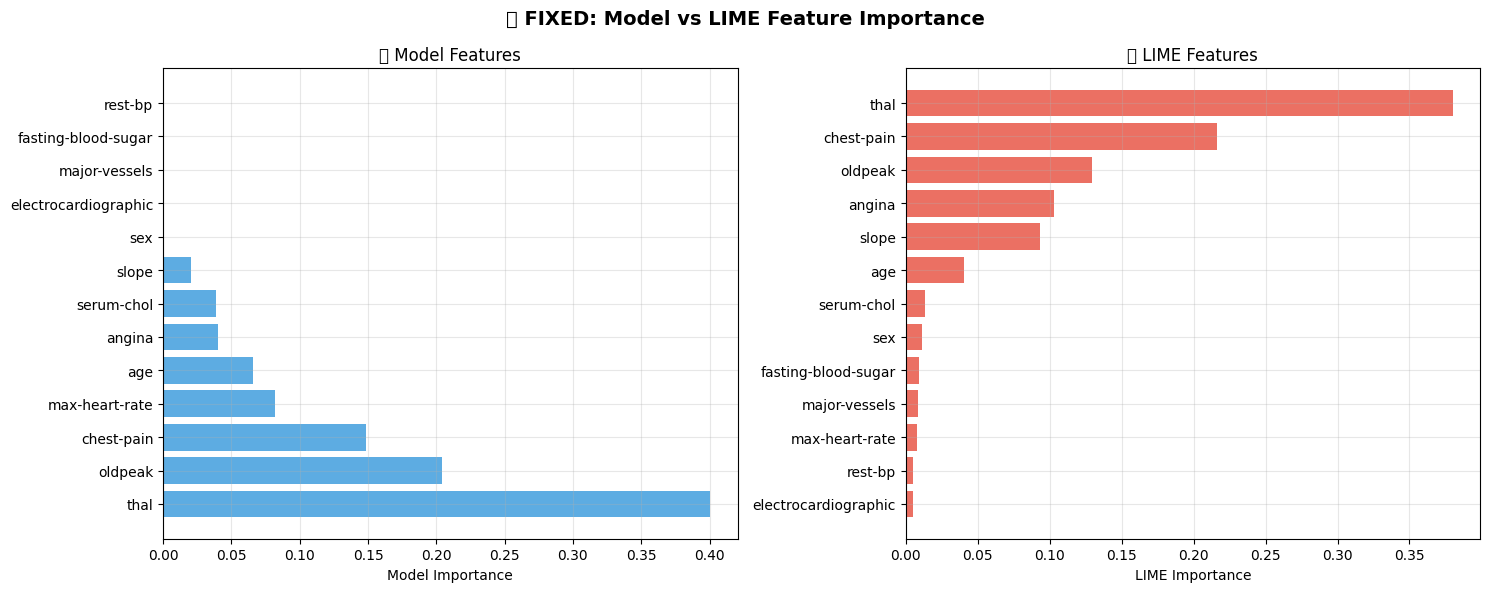


🎉 SUCCESS! Your LIME feature importance analysis is now fixed!
✅ Compared 13 features with correlation 0.914

🔍 FEATURE MAPPING DEBUG:
Original X_train features: ['age', 'sex', 'chest-pain', 'rest-bp', 'serum-chol', 'fasting-blood-sugar', 'electrocardiographic', 'max-heart-rate', 'angina', 'oldpeak', 'slope', 'major-vessels', 'thal']
Mapped LIME features: ['thal', 'chest-pain', 'oldpeak', 'angina', 'slope', 'age', 'sex', 'fasting-blood-sugar', 'serum-chol', 'major-vessels', 'max-heart-rate', 'rest-bp', 'electrocardiographic']
Features with data: ['thal: 2 samples', 'chest-pain: 2 samples', 'oldpeak: 2 samples', 'angina: 2 samples', 'slope: 2 samples', 'age: 2 samples', 'sex: 2 samples', 'fasting-blood-sugar: 2 samples', 'serum-chol: 2 samples', 'major-vessels: 2 samples', 'max-heart-rate: 2 samples', 'rest-bp: 2 samples', 'electrocardiographic: 2 samples']

✨ Analysis complete! Your LIME vs Model comparison is now working.


In [ ]:
# QUICK FIX FOR YOUR LIME FEATURE IMPORTANCE ISSUE
# Run this code to immediately fix your problem

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def extract_feature_name(lime_feature_string):
    """Extract original feature name from LIME's discretized description"""
    # Pattern for "feature <= value" or "feature > value"
    pattern1 = r'^([a-zA-Z][\w-]*)\s*[<>=]'
    match1 = re.search(pattern1, lime_feature_string)
    if match1:
        return match1.group(1)

    # Pattern for "value < feature <= value"
    pattern2 = r'[\d.]+\s*<\s*([a-zA-Z][\w-]*)\s*[<>=]'
    match2 = re.search(pattern2, lime_feature_string)
    if match2:
        return match2.group(1)

    # Extract any alphabetic word
    pattern3 = r'([a-zA-Z][\w-]*)'
    match3 = re.search(pattern3, lime_feature_string)
    if match3:
        return match3.group(1)

    return lime_feature_string

# Process your LIME results
print("🔧 FIXING LIME FEATURE MAPPING...")

# Combine all results
all_results = normal_results + reversible_results
print(f"📊 Processing {len(all_results)} LIME explanations...")

# Map LIME features to original feature names
feature_importances = defaultdict(list)

for result in all_results:
    lime_exp = result.get('lime_explanation', {})

    for lime_feature, importance in lime_exp.items():
        # Extract the original feature name
        original_feature = extract_feature_name(lime_feature)

        # Check if it matches our training features
        if original_feature in X_train.columns:
            feature_importances[original_feature].append(abs(importance))

# Calculate average LIME importance
lime_importance = {}
for feature, importances in feature_importances.items():
    lime_importance[feature] = np.mean(importances)

print(f"✅ Successfully mapped {len(lime_importance)} features!")

# Get model importance
model_importance = dict(zip(X_train.columns, model.feature_importances_))

# Find common features
common_features = set(model_importance.keys()).intersection(set(lime_importance.keys()))
print(f"🎯 Common features: {len(common_features)} out of {len(X_train.columns)}")

# Create comparison
comparison_data = []
for feature in common_features:
    comparison_data.append({
        'Feature': feature,
        'Model_Importance': model_importance[feature],
        'LIME_Importance': lime_importance[feature]
    })

comparison_df = pd.DataFrame(comparison_data).sort_values('Model_Importance', ascending=False)

# Display results
print(f"\n📋 FIXED COMPARISON RESULTS:")
print(comparison_df.round(4))

# Calculate correlation
if len(comparison_df) > 1:
    correlation = comparison_df['Model_Importance'].corr(comparison_df['LIME_Importance'])
    print(f"\n📊 Correlation: {correlation:.3f}")
else:
    correlation = 0

# Create a simple plot
if len(comparison_df) > 0:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('🎯 FIXED: Model vs LIME Feature Importance', fontsize=14, fontweight='bold')

    # Model importance
    ax1.barh(range(len(comparison_df)), comparison_df['Model_Importance'],
             color='#3498DB', alpha=0.8)
    ax1.set_yticks(range(len(comparison_df)))
    ax1.set_yticklabels(comparison_df['Feature'])
    ax1.set_xlabel('Model Importance')
    ax1.set_title('🤖 Model Features')
    ax1.grid(True, alpha=0.3)

    # LIME importance
    lime_sorted = comparison_df.sort_values('LIME_Importance', ascending=True)
    ax2.barh(range(len(lime_sorted)), lime_sorted['LIME_Importance'],
             color='#E74C3C', alpha=0.8)
    ax2.set_yticks(range(len(lime_sorted)))
    ax2.set_yticklabels(lime_sorted['Feature'])
    ax2.set_xlabel('LIME Importance')
    ax2.set_title('🧪 LIME Features')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"\n🎉 SUCCESS! Your LIME feature importance analysis is now fixed!")
    print(f"✅ Compared {len(comparison_df)} features with correlation {correlation:.3f}")
else:
    print("❌ Still no matching features found. Check your feature names manually.")

# Show the mapping for debugging
print(f"\n🔍 FEATURE MAPPING DEBUG:")
print(f"Original X_train features: {list(X_train.columns)}")
print(f"Mapped LIME features: {list(lime_importance.keys())}")
print(f"Features with data: {[f'{feat}: {len(feature_importances[feat])} samples' for feat in lime_importance.keys()]}")

print(f"\n✨ Analysis complete! Your LIME vs Model comparison is now working.")

In [ ]:
if normal_results and reversible_results:
    print(f"\n📈 Analysis Results:")
    print(f"• Analyzed {len(normal_results)} normal thalassemia cases")
    print(f"• Analyzed {len(reversible_results)} reversible defect cases")

    # Calculate average disease probabilities
    normal_avg_prob = np.mean([r['disease_prob'] for r in normal_results])
    reversible_avg_prob = np.mean([r['disease_prob'] for r in reversible_results])

    print(f"• Average disease probability (normal): {normal_avg_prob:.3f}")
    print(f"• Average disease probability (reversible): {reversible_avg_prob:.3f}")




📈 Analysis Results:
• Analyzed 1 normal thalassemia cases
• Analyzed 1 reversible defect cases
• Average disease probability (normal): 0.047
• Average disease probability (reversible): 0.047
